In [1]:
import sys
sys.path.append('./scripts')

In [2]:
sys.version

'2.7.11 |Anaconda 2.3.0 (64-bit)| (default, Dec  6 2015, 18:08:32) \n[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]'

In [3]:
import numpy as np

In [4]:
import sklearn
from IPython.display import Image 
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
clf = tree.DecisionTreeRegressor()
import tree_to_dict
from sklearn.externals import joblib

%matplotlib inline


In [5]:
np.loadtxt('../data/Ht.txt',skiprows=0, dtype=np.float64)

array([[ -2.81467040e-07,  -2.34740700e-07,  -2.09770750e-07, ...,
         -1.03084960e-07,  -8.31573740e-08,  -7.13508260e-08],
       [ -3.16907890e-07,  -2.75000420e-07,  -2.47578670e-07, ...,
         -1.17969640e-07,  -1.00952460e-07,  -9.04247490e-08],
       [ -3.38413540e-07,  -3.15388320e-07,  -3.05160400e-07, ...,
         -1.54530500e-07,  -1.36889770e-07,  -1.25013000e-07],
       ..., 
       [ -5.69642000e-07,  -5.58196580e-07,  -5.38326900e-07, ...,
         -2.09608030e-07,  -2.10239930e-07,  -1.95144070e-07],
       [ -5.87961440e-07,  -5.74981360e-07,  -5.34893270e-07, ...,
         -1.52148900e-07,  -1.56362660e-07,  -1.43316290e-07],
       [ -6.00122410e-07,  -5.87407560e-07,  -5.40756450e-07, ...,
         -1.16781640e-07,  -1.01914790e-07,  -8.63592080e-08]])

In [6]:
Ht = np.loadtxt('../data/Ht.txt',skiprows=0, dtype=np.float64)
Po = np.loadtxt('../data/Po.txt',skiprows=0, dtype=np.float64)
Ph = np.loadtxt('../data/Ph.txt',skiprows=0, dtype=np.float64)
Am = np.loadtxt('../data/Am.txt',skiprows=0, dtype=np.float64)
Pl = np.loadtxt('../data/Pl.txt',skiprows=0, dtype=np.float64)
Ht2 = np.loadtxt('../data/Height.txt',skiprows=0, dtype=np.float64)
Po2 = np.loadtxt('../data/Potential.txt',skiprows=0, dtype=np.float64)
Ph2 = np.loadtxt('../data/Phase.txt',skiprows=0, dtype=np.float64)
Am2 = np.loadtxt('../data/Amplitude.txt',skiprows=0, dtype=np.float64)
Pl2 = np.loadtxt('../data/Photoluminescence.txt',skiprows=0, dtype=np.float64)

In [7]:
# flatten the images
Ht_flat = Ht.flatten()
Po_flat = Po.flatten()
Ph_flat = Ph.flatten()
Am_flat = Am.flatten()
Pl_flat = Pl.flatten()
Ht2_flat = Ht2.flatten()
Po2_flat = Po2.flatten()
Ph2_flat = Ph2.flatten()
Am2_flat = Am2.flatten()
Pl2_flat = Pl2.flatten()

In [8]:
X = [Ht_flat, Po_flat, Ph_flat, Am_flat]
X = np.array(X).T
Y = np.array(Pl_flat).T
print(X.shape)
print(Y.shape)
Y

(65536, 4)
(65536,)


array([ 3201.,  3166.,  3208., ...,  3810.,  4895.,  7214.])

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, random_state=0)
clf = DecisionTreeRegressor(max_depth=11)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

In [10]:
metrics.mean_squared_error(ytest, ypred)

133442220.40554033

In [11]:
print(clf)

DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


In [12]:
# We can export to a graphviz file, if we want to: 
with open("./results/afm_tree.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)
    
# Note that the sklearn tutorial uses pydot to turn .dot into .pdf; 
# It isn't supported in Python 3.  
# Instead figure out how to do it with https://pypi.python.org/pypi/graphviz, 
# or just take the .dot straight into d3 as Matt showed. 

## Demo of tree depth v.s. trees in the forrest

0.119711213328
0.119596692536
0.12032486057
0.120017927886
0.119470864414
0.11906993349
0.118253997314
0.118278459093
0.117074019706
0.114595668196
0.11351230604
0.11223111118
0.112602149999
0.11173038667
0.111918056256
0.113004829294
0.112286107741
0.11119799567
0.111908236323
0.111208297691
0.111357889188
0.114286470381
0.1145183649
0.111975107074
0.112809430901


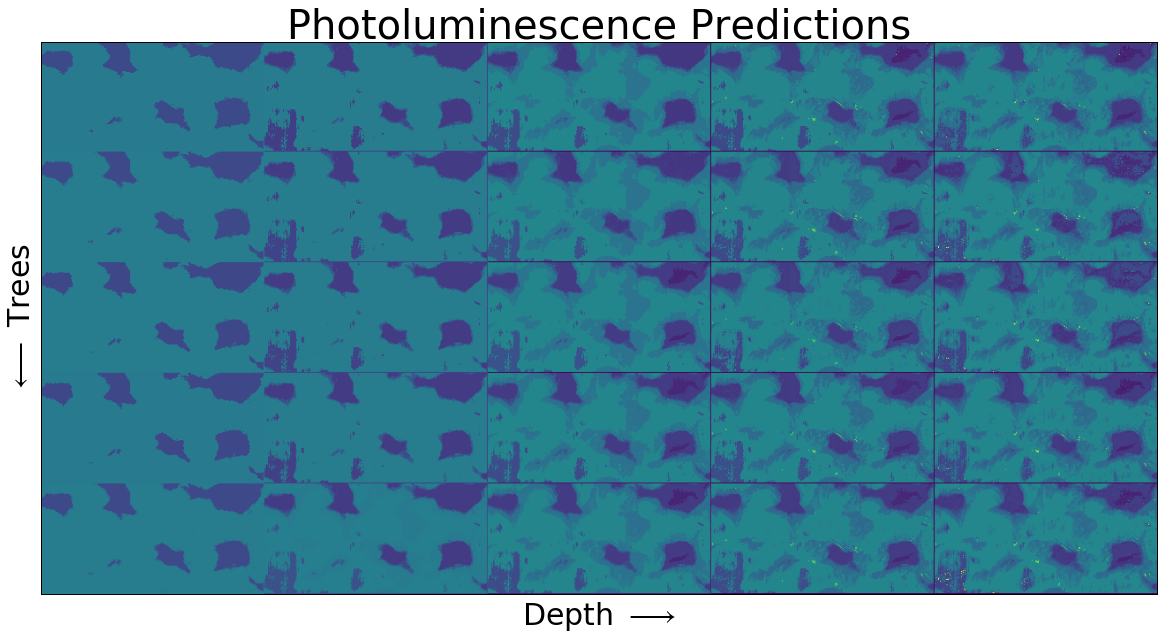

In [13]:
Xtrain = np.array([Ht2_flat[0:31625], Po2_flat[0:31625], Ph2_flat[0:31625], Am2_flat[0:31625]]).T
Xtest = np.array([Ht2_flat[31625:], Po2_flat[31625:], Ph2_flat[31625:], Am2_flat[31625:]]).T
Ytrain = np.array(Pl2_flat[0:31625])
Ytest = np.array(Pl2_flat[31625:])

depths = 5
trees = 5
x = Ht2.shape[0]/2*trees
y = Ht2.shape[1]
k=0
prediction = []

for q in range(1,depths+1):
    for r in range(1,trees+1):
        clf = RandomForestRegressor(max_depth=q, n_estimators=r, bootstrap=True)
        clf.fit(Xtrain, Ytrain)
        hold = clf.predict(Xtest)
        print(metrics.mean_squared_error(Ytest, hold))
        prediction.append(hold)
        k = k + 1
    

k=0
merge = (np.array(prediction).flatten())
Pl_predict = np.zeros((x,y*depths))
for l in range(depths):
    for i in range(x):
        for j in range (y):
            Pl_predict[i,j+(l*y)] = merge[k]
            k = k + 1

fig = plt.figure(figsize=(20,10))
pl_ax = fig.add_subplot(1,1,1)
pl_ax.imshow(Pl_predict, cmap='viridis')
pl_ax.set_title('Photoluminescence Predictions', size=40)
pl_ax.set_ylabel('$\longleftarrow$ Trees', size=30)
pl_ax.set_xlabel('Depth $\longrightarrow$', size=30)
pl_ax.axes.get_xaxis().set_ticks([])
pl_ax.axes.get_yaxis().set_ticks([])

fig.savefig(filename='afm_depth', bbox_inches='tight')

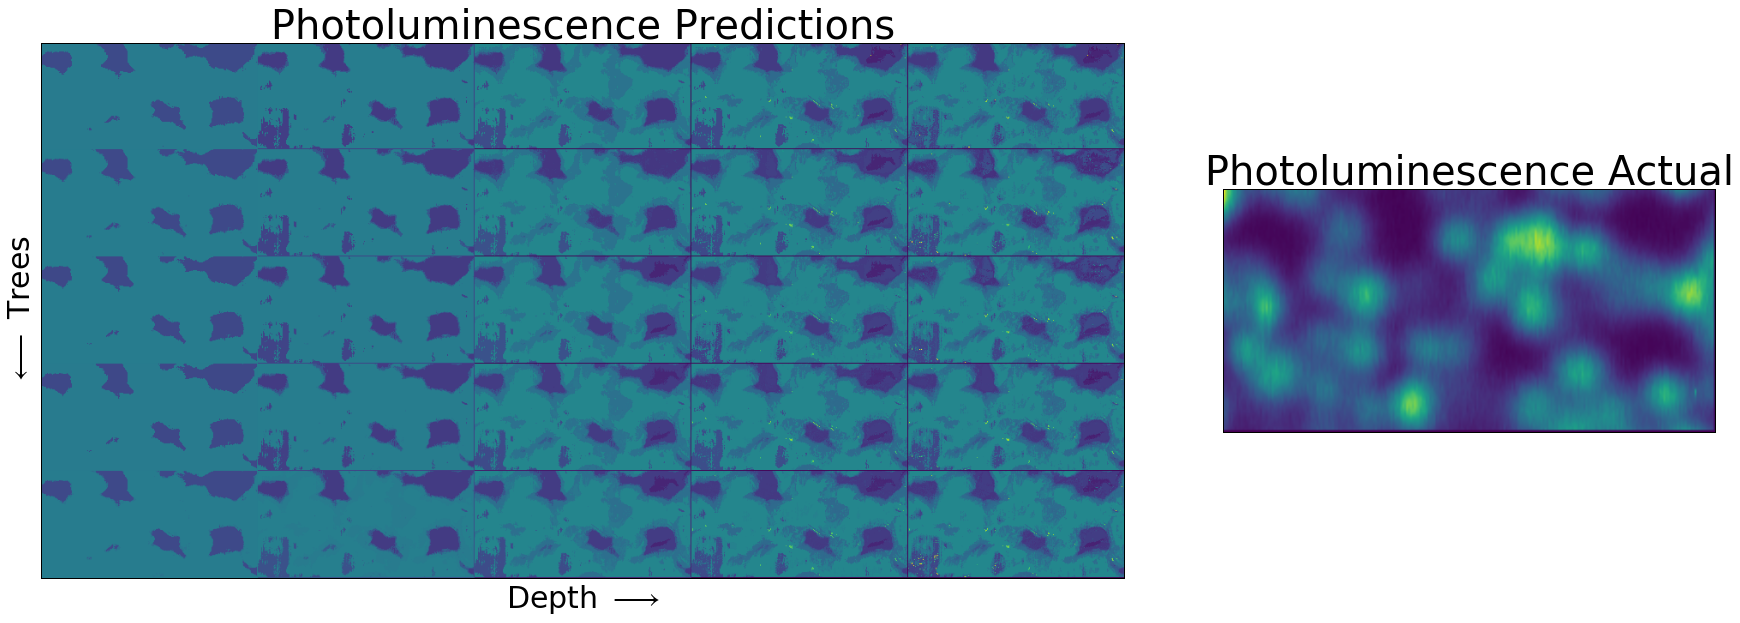

In [14]:
depths = 5
trees = 5
x = Ht2.shape[0]/2*trees
y = Ht2.shape[1]
k=0
merge = (np.array(prediction).flatten())
Pl_predict = np.zeros((x,y*depths))
for l in range(depths):
    for i in range(x):
        for j in range (y):
            Pl_predict[i,j+(l*y)] = merge[k]
            k = k + 1

fig = plt.figure(figsize=(30,10))
pl_ax = fig.add_subplot(1,3,(1,2))
pl_ax.imshow(Pl_predict, cmap='viridis')
pl_ax.set_title('Photoluminescence Predictions', size=40)
pl_ax.set_ylabel('$\longleftarrow$ Trees', size=30)
pl_ax.set_xlabel('Depth $\longrightarrow$', size=30)
pl_ax.axes.get_xaxis().set_ticks([])
pl_ax.axes.get_yaxis().set_ticks([])
pl_ax2 = fig.add_subplot(1,3,3)
pl_ax2.set_title('Photoluminescence Actual', size=40)
pl_ax2.imshow(Pl2[Pl2.shape[0]/2:,:], cmap='viridis')
pl_ax2.axes.get_xaxis().set_ticks([])
pl_ax2.axes.get_yaxis().set_ticks([])
fig.savefig(filename='afm_depth', bbox_inches='tight')

## Demo of sklearn tree --> dict --> json

In [13]:
import tree_to_dict

In [14]:
tree_to_dict.rules(clf, ['Ht2_flat', 'Po2_flat', 'Ph2_flat', 'Am2_flat'], 'photoluminescence')

{'children': [{'children': [{'children': [{'children': [{'children': [{'children': [{'children': [{'children': [{'children': [{'children': [{'children': [{'name': '6515 of p'},
                      {'name': '5362 of p'}],
                     'name': 'Po2_flat > 0.08500814437866211'},
                    {'name': '2723 of p'}],
                   'name': 'Ph2_flat > 69.14630126953125'},
                  {'children': [{'children': [{'name': '7654 of p'},
                      {'name': '8467 of p'}],
                     'name': 'Ph2_flat > 72.55138397216797'},
                    {'children': [{'name': '5930 of p'},
                      {'name': '6735 of p'}],
                     'name': 'Ph2_flat > 73.4109878540039'}],
                   'name': 'Po2_flat > 0.08319616317749023'}],
                 'name': 'Po2_flat > 0.08350729942321777'},
                {'children': [{'children': [{'children': [{'name': '9990 of p'},
                      {'name': '3439 of p'}],
                 

In [15]:
# Use Janet's wrapper to save the tree as json:
tree_to_dict.save_tree_as_dict(clf, feature_names=['Ht2_flat', 'Po2_flat', 'Ph2_flat', 'Am2_flat'],
                               label_names='photoluminescence', 
                               save_path='./results/sample_json_from_sklearn.json', node_index=0)

In [37]:
joblib.dump(clf, 'filename.pkl') 

['filename.pkl',
 'filename.pkl_01.npy',
 'filename.pkl_02.npy',
 'filename.pkl_03.npy',
 'filename.pkl_04.npy',
 'filename.pkl_05.npy',
 'filename.pkl_06.npy',
 'filename.pkl_07.npy',
 'filename.pkl_08.npy',
 'filename.pkl_09.npy',
 'filename.pkl_10.npy',
 'filename.pkl_11.npy',
 'filename.pkl_12.npy',
 'filename.pkl_13.npy',
 'filename.pkl_14.npy',
 'filename.pkl_15.npy']

In [16]:
Xtrain = np.array([Ht2_flat[0:31625], Po2_flat[0:31625], Ph2_flat[0:31625], Am2_flat[0:31625]]).T
Xtest = np.array([Ht2_flat[31625:], Po2_flat[31625:], Ph2_flat[31625:], Am2_flat[31625:]]).T
Ytrain = np.array(Pl2_flat[0:31625])
Ytest = np.array(Pl2_flat[31625:])

prediction = []
clf = tree.RandomForestClassifier(max_depth=5, n_estimators=3, bootstrap=True)
clf.fit(Xtrain, Ytrain)
hold = clf.predict(Xtest)
print(metrics.mean_squared_error(Ytest, hold))
prediction.append(hold)

clf.tree.export_graphviz(decision_tree)

joblib.dump(clf, 'filename.pkl')  

AttributeError: 'module' object has no attribute 'RandomForestClassifier'

In [19]:
import pydot 
clf = tree.DecisionTreeRegressor()

dot_data = StringIO() 
clf = clf.fit(Xtrain, Ytrain)
tree.export_graphviz(clf, out_file=dot_data)    
#pydot.graph_from_dot_data(dot_data.getvalue())

In [72]:
import pydot 
graph = pydot.graph_from_dot_data(tree.export_graphviz(clf, out_file='tree.dot').getvalue())  
Image(graph.create_png())  

AttributeError: 'NoneType' object has no attribute 'children_left'

In [23]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

from sklearn.externals.six import StringIO
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

import os
os.unlink('iris.dot')

from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("iris.pdf") 

from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

NameError: global name 'dot_parser' is not defined